# CASE STUDY - PREDICTING ELECTRIC ENERGY

### STEP 1 : PROBLEM STATEMENT

 - We will build an ANN Regression model to predict the electrical energy output of a Combined Cycle Power Plant.


 - The dataset contains 47,871 data points collected from a Combined Cycle Power Plant over 6 years (2014-2020), when the power plant was set to work with full load.
 
 
 - Features consist of hourly average ambient variables
     - Temperature (T) in the range 1.81°C and 37.11°C,
     
     - Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
     
     - Relative Humidity (RH) in the range 25.56% to 100.16%
     
     - Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
     
     - Net hourly electrical energy output (EP) 420.26-495.76 MW

### STEP 2 : IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### STEP 3 : IMPORTING DATSET

In [2]:
df = pd.read_excel("Electrical_Energy.xlsx")
print("Data Imported Successfully")

Data Imported Successfully


###  STEP 4 : EXPLORATORY DATA ANALYSIS / DATA PREPROCESSING / DATA WRANGLING

In [3]:
# Checking shape of the data.

df.shape

(47840, 5)

In [4]:
# Nos of columns in the data 

df.keys()

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [5]:
# Checking top 5 records

df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
# Checking info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
AT    47840 non-null float64
V     47840 non-null float64
AP    47840 non-null float64
RH    47840 non-null float64
PE    47840 non-null float64
dtypes: float64(5)
memory usage: 1.8 MB


In [7]:
# Checking null values

df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
# Checking Summary

df.describe()

,AT,V,AP,RH,PE
count,47840.000000,47840.000000,47840.000000,47840.000000,47840.000000
mean,19.651240,54.305804,1013.259078,73.308978,454.365009
std,7.452166,12.707362,5.938535,14.599658,17.066281
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [9]:
# Renaming columns

df.rename(columns = {
    'AT' : 'Temperature',
    'AP' : 'Pressure',
    'RH' : 'Humidity',
    'V'  : 'Vacuum',
    'PE' : 'Electrical Power'
}, inplace = True)

df.head()

,Temperature,Vacuum,Pressure,Humidity,Electrical Power
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


No need of following things to apply as dataset is already clean.

 - No null values to handle 


 - No categorical values to handle 


 - No repositioning of columns to be done.


 - No data renaming within the columns are required.


#### EDA - Continous Values Visualization

> > `Temperature`

In [10]:
# 5 point summary

df['Temperature'].describe()

count    47840.000000
mean        19.651240
std          7.452166
min          1.810000
25%         13.510000
50%         20.345000
75%         25.720000
max         37.110000
Name: Temperature, dtype: float64

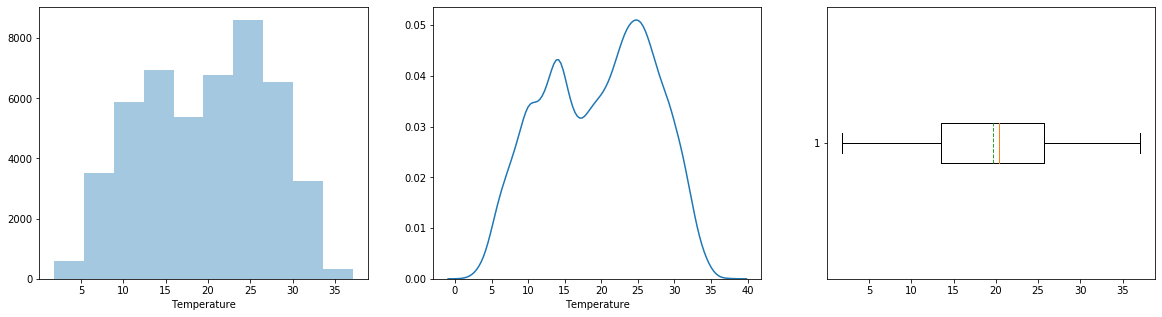

In [11]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(df['Temperature'], kde = False , bins = 10)

plt.subplot(1,3,2)
sns.distplot(df['Temperature'] , hist = False )

plt.subplot(1,3,3)
plt.boxplot(x = df['Temperature'],
            vert = False,
            meanline= True,
            showmeans= True)

plt.show()

- Above graphs are conveying the same message but in different way.


- With the help of box-plot we could predict that `mean < median`, so it is left skewed where the majority of the observation are on the high end on the scale.

> > `Vacuum`

In [12]:
# 5 point summary 

df['Vacuum'].describe()

count    47840.000000
mean        54.305804
std         12.707362
min         25.360000
25%         41.740000
50%         52.080000
75%         66.540000
max         81.560000
Name: Vacuum, dtype: float64

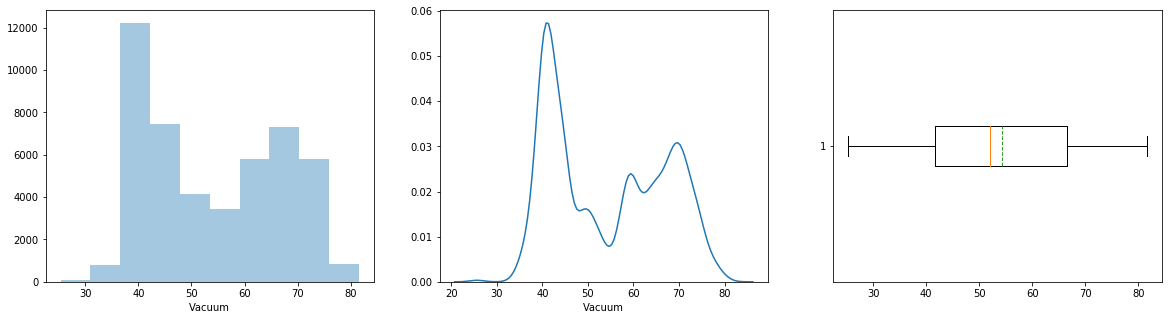

In [13]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.distplot(df['Vacuum'], kde=False, bins=10)

plt.subplot(1,3,2)
sns.distplot(df['Vacuum'], hist=False)

plt.subplot(1,3,3)
plt.boxplot(x = df['Vacuum'],
            vert = False,
            meanline = True,
            showmeans = True)

plt.show()

- Above graphs are conveying the same message but in different way.


- With the help of box-plot we could predict that 'mean > median' (Median is close to Q1) so it is right skewed.

> > `Pressure`

In [14]:
# 5 point summary

df['Pressure'].describe()

count    47840.000000
mean      1013.259078
std          5.938535
min        992.890000
25%       1009.100000
50%       1012.940000
75%       1017.260000
max       1033.300000
Name: Pressure, dtype: float64

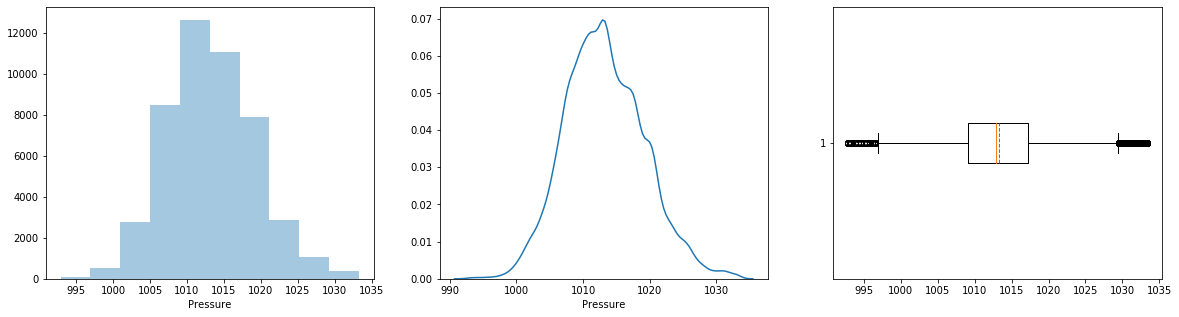

In [15]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.distplot(df['Pressure'], kde=False, bins=10)

plt.subplot(1,3,2)
sns.distplot(df['Pressure'], hist=False)

plt.subplot(1,3,3)
plt.boxplot(x = df['Pressure'],
            vert = False,
            meanline = True,
            showmeans = True)

plt.show()

 - Above graphs are conveying the same message but in different way.
 
 
 - Large amount of variability can be seen from the box plot outside the upper and lower quartiles.
 
 
 - The graph looks to be symmetric where there is very minute difference between mean and median.

> > `Humidity`

In [16]:
# 5 point summary 

df['Humidity'].describe()

count    47840.000000
mean        73.308978
std         14.599658
min         25.560000
25%         63.327500
50%         74.975000
75%         84.830000
max        100.160000
Name: Humidity, dtype: float64

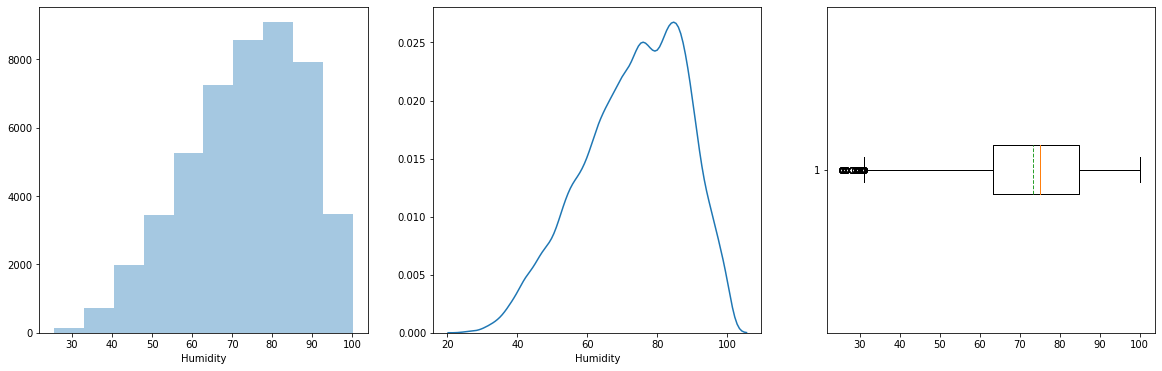

In [17]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
sns.distplot(df['Humidity'], kde=False, bins=10)

plt.subplot(1,3,2)
sns.distplot(df['Humidity'], hist=False)

plt.subplot(1,3,3)
plt.boxplot(x = df['Humidity'],
            vert = False,
            meanline = True,
            showmeans = True)

plt.show()

 - Above graphs are conveying the same message but in differnt way.
 
 
 - We can see that attribute `humidity` is left skewed (negative) which implies that majority of the observation are lying on the high end scale.
 
 
 - Also we can observe variablity in the data towards lower quartile side.

> > `Electrical Power`

In [18]:
# 5 point summary

df['Electrical Power'].describe()

count    47840.000000
mean       454.365009
std         17.066281
min        420.260000
25%        439.750000
50%        451.550000
75%        468.430000
max        495.760000
Name: Electrical Power, dtype: float64

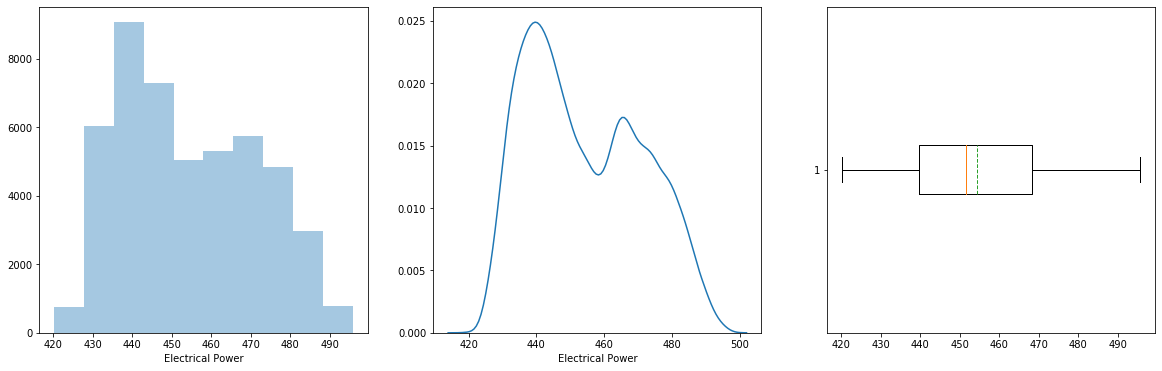

In [19]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
sns.distplot(df['Electrical Power'], kde=False, bins=10)

plt.subplot(1,3,2)
sns.distplot(df['Electrical Power'], hist=False)

plt.subplot(1,3,3)
plt.boxplot(x = df['Electrical Power'],
            vert = False,
            meanline = True,
            showmeans = True)

plt.show()

- Above graphs are conveying the same message but in different way 


- We can see that attribute `ELectrical Power` is positivly right skewed where most of the observation are lying on th high end of the scale.


- We can also observe that the `mean > median` which results in postive skewness of the graph

### STEP 5 : FEATURE SELECTION / DIMENSIONALITY REDUCTION / MULTICOLLINEARITY

#### VIF Calculation

In [29]:
numeric_df = df[['Temperature', 'Vacuum', 'Pressure', 'Humidity', 'Electrical Power']]

x_vif = numeric_df.drop(['Electrical Power'] , axis = 1)
y_vif = numeric_df[['Electrical Power']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]
vif["features"] = x_vif.columns
vif

,VIF Factor,features
0,39.157997,Temperature
1,74.969732,Vacuum
2,66.618569,Pressure
3,40.704801,Humidity


#### Correlation Map - Heat Map

(5.0, 0.0)

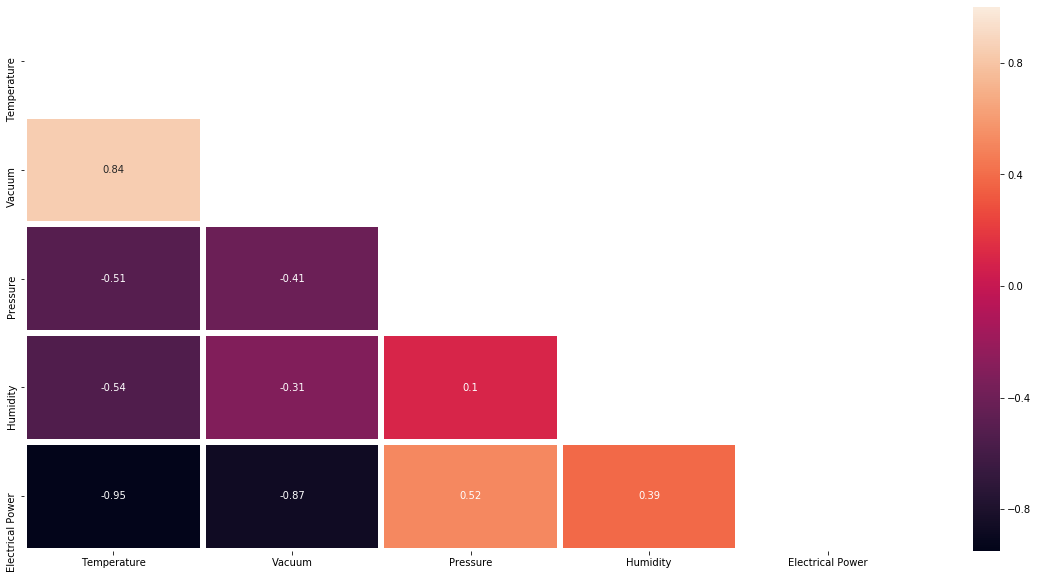

In [31]:
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr())
ax = sns.heatmap(data=df.corr(), linewidths=5, annot=True, mask=matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

When VIF is greater than 5, there is an indication that multicollinearity may be present. However when VIF is greater than 10, there is high multicollinearity. 

In the above case we can see that there is high multicollinearity between all the 4 variables and we are going for Artifial Neural Network implementation so removing the columns won't be applicable, as in this case  we already have very less predictors / targets followed by huge amount of data.

### STEP 6 : MODEL BUILDING

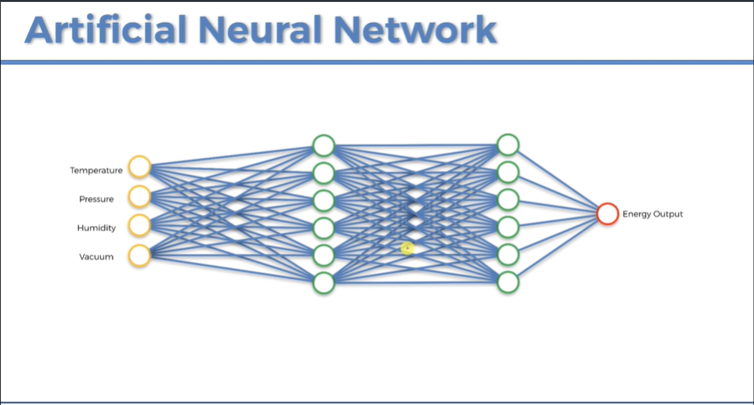

#### Splitting Data - Independent & Dependent 

In [90]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4:5].values

#### Splitting Data - Training & Test

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling 

In [92]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### Building Artificial Neural Network

In [93]:
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

> `Step 1` : Initialization

We will create a variable called artifical neural network itself. this variable will be created as an object of certain class and that certain class is the `Sequential Class` which allow us to build the artificial neural network as a sequence of layers and it is taken from models modules which belongs to keras library and indeed it belongs to tensorflow.

In [56]:
ann = tf.keras.models.Sequential()

> `Step 2` : Adding input layer and first hidden layer

Here we will be using the `Dense Class` to add the input layer and first hidden layer. We would be using artificial neural object i.e. ann of Sequential Class from which we will call one of the method `add` which will be acting as an instance of another class called `Dense Class`. It helps to add fully connected layers and automatically adds input layers neurons when we are providing matrix of features X during trianing ANN

In [57]:
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))

> `Step 3` : Adding second hidden layer

Here we will be using same command which we used to add input layer and 1st hidden layer.

In [58]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

> `Step 4` : Adding output layer 

We will be using `units=1` as we require only 1 neuron in our output layer. Also we wont provide any activation function as we are doing regression type of problem.

In [59]:
ann.add(tf.keras.layers.Dense(units = 1))

#### Training Artificial Neural Network

> `Step 1` : Compiling ANN

We would be using same artificial neural object and this time we will be calling a new method - `compile` which will take 2 parameters.

- `optimizer` = adam (Most commonly used as it can performs Stochastic Gradient Descent which will update the weights and reduce your loss error between predicted and actual result)


- `loss` =  binary_crossentrophy or categorical_crossentrophy if using classification else we use mean_squared_error for regression (depending upon our output neuron)

In [63]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

> `Step 2` : Trianing ANN

We will be using same artificial neural object and this time we will be calling a new method - `fit` which will take following parameters.

  - `X_train & y_train` = data needed for training our ANN
  
  
  - `batch_size` = batch learning is indeed more efficient and performant when training the artifical neural network.
  
  
  - `epochs` = neural network is trained on certain amount of epochs to improve the accuracy over the time. 

In [94]:
ann.fit(x = X_train, 
        y = y_train, 
        batch_size = 32, 
        epochs = 100, 
        shuffle = 1,
        validation_split = 0.05)

Train on 36358 samples, validate on 1914 samples
Epoch 1/100
36358/36358 [==============================] - 2s 55us/sample - loss: 134479.0630 - val_loss: 59643.7289
Epoch 2/100
36358/36358 [==============================] - 2s 55us/sample - loss: 31989.8653 - val_loss: 14209.4812
Epoch 3/100
36358/36358 [==============================] - 2s 46us/sample - loss: 7375.0320 - val_loss: 3334.6816
Epoch 4/100
36358/36358 [==============================] - 2s 61us/sample - loss: 2003.7472 - val_loss: 1140.1943
Epoch 5/100
36358/36358 [==============================] - 2s 59us/sample - loss: 785.5617 - val_loss: 477.0309
Epoch 6/100
36358/36358 [==============================] - 2s 56us/sample - loss: 334.1834 - val_loss: 201.3019
Epoch 7/100
36358/36358 [==============================] - 2s 57us/sample - loss: 143.1305 - val_loss: 92.6663
Epoch 8/100
36358/36358 [==============================] - 2s 54us/sample - loss: 68.5611 - val_loss: 50.0864
Epoch 9/100
36358/36358 [====================

36358/36358 [==============================] - 2s 59us/sample - loss: 18.3180 - val_loss: 18.5967
Epoch 75/100
36358/36358 [==============================] - 2s 57us/sample - loss: 18.4106 - val_loss: 18.5185
Epoch 76/100
36358/36358 [==============================] - 2s 56us/sample - loss: 18.3518 - val_loss: 18.7593
Epoch 77/100
36358/36358 [==============================] - 2s 57us/sample - loss: 18.3834 - val_loss: 18.7533
Epoch 78/100
36358/36358 [==============================] - 2s 56us/sample - loss: 18.3910 - val_loss: 18.3799
Epoch 79/100
36358/36358 [==============================] - 2s 55us/sample - loss: 18.3755 - val_loss: 18.5144
Epoch 80/100
36358/36358 [==============================] - 2s 56us/sample - loss: 18.4076 - val_loss: 18.7925
Epoch 81/100
36358/36358 [==============================] - 2s 50us/sample - loss: 18.3811 - val_loss: 18.5656
Epoch 82/100
36358/36358 [==============================] - 2s 55us/sample - loss: 18.3884 - val_loss: 18.4920
Epoch 83/100
3

### STEP 7 : MODEL EVALUATION

We will be using same artificial neural network object and this time we will be calling `predict` method which accepts inputs as a 2D array. Also values need to be scaled as ANN was trained on scaled values.

#### Actual v/s Predicted

In [96]:
y_pred = ann.predict(X_test)

df_test = pd.DataFrame({
    'Actual Values'    : y_test.flatten(),
    'Predicted Values' : y_pred.flatten()
    })

df_test.head()

,Actual Values,Predicted Values
0,436.29,438.265442
1,438.08,443.251862
2,476.12,473.638916
3,485.78,491.066986
4,436.08,435.122406


#### R2 - Score / Mean Squared Error

In [105]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Accuracy           :", (r2_score(y_test,y_pred)*100))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred))

Accuracy           : 93.73129059591002
Mean Squared Error : 18.008838070523318


### STEP 8 : MODEL EVALUATION / HYPER PARAMETER TUNING

> `CASE 1` : More Hidden Layers

In [107]:
#Initialize Neural Network
ann1 = tf.keras.models.Sequential()

#Addition of layers
ann1.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann1.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

#Addition of Outpur layer
ann1.add(tf.keras.layers.Dense(units = 1))

#Compiling ANN
ann1.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Fitting training data
ann1.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38272/38272 [==============================] - 3s 84us/sample - loss: 58594.0531
Epoch 2/100
38272/38272 [==============================] - 3s 70us/sample - loss: 1314.8652
Epoch 3/100
38272/38272 [==============================] - 2s 62us/sample - loss: 157.8312
Epoch 4/100
38272/38272 [==============================] - 3s 70us/sample - loss: 43.0079
Epoch 5/100
38272/38272 [==============================] - 3s 71us/sample - loss: 25.8131
Epoch 6/100
38272/38272 [==============================] - 3s 71us/sample - loss: 22.6114
Epoch 7/100
38272/38272 [==============================] - 3s 68us/sample - loss: 21.9183
Epoch 8/100
38272/38272 [==============================] - 3s 72us/sample - loss: 21.8331
Epoch 9/100
38272/38272 [==============================] - 2s 57us/sample - loss: 21.6639
Epoch 10/100
38272/38272 [==============================] - 3s 70us/sample - loss: 21.6386
Epoch 11/100
38272/38272 [==============================] - 3s 69us/sample - loss: 21.7741
Ep

38272/38272 [==============================] - 3s 68us/sample - loss: 19.5313
Epoch 92/100
38272/38272 [==============================] - 3s 69us/sample - loss: 19.3287
Epoch 93/100
38272/38272 [==============================] - 3s 67us/sample - loss: 19.3607
Epoch 94/100
38272/38272 [==============================] - 2s 64us/sample - loss: 19.4292
Epoch 95/100
38272/38272 [==============================] - 2s 60us/sample - loss: 19.4405
Epoch 96/100
38272/38272 [==============================] - 2s 60us/sample - loss: 19.2473
Epoch 97/100
38272/38272 [==============================] - 3s 68us/sample - loss: 19.3288
Epoch 98/100
38272/38272 [==============================] - 3s 69us/sample - loss: 19.3880
Epoch 99/100
38272/38272 [==============================] - 2s 65us/sample - loss: 19.4577
Epoch 100/100
38272/38272 [==============================] - 2s 57us/sample - loss: 19.3225


In [108]:
#Actual vs Predicted 

y_pred1 = ann1.predict(X_test)

df_test1 = pd.DataFrame({
    'Actual Values'    : y_test.flatten(),
    'Predicted Values' : y_pred1.flatten()
    })

df_test1.head()

,Actual Values,Predicted Values
0,436.29,437.072174
1,438.08,441.339172
2,476.12,472.429474
3,485.78,491.137268
4,436.08,433.495117


In [110]:
#R2-Score / Mean Squared Error

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Accuracy           :", (r2_score(y_test,y_pred1)*100))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred1))

Accuracy           : 93.53414913067354
Mean Squared Error : 18.57518889261009


---

> `CASE 2` : More Epochs

In [111]:
#Initialize Neural Network
ann2 = tf.keras.models.Sequential()

#Addition of layers
ann2.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann2.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

#Addition of Outpur layer
ann2.add(tf.keras.layers.Dense(units = 1))

#Compiling ANN
ann2.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Fitting training data
ann2.fit(X_train, y_train, batch_size = 32, epochs = 150)

Epoch 1/150
38272/38272 [==============================] - 3s 74us/sample - loss: 133687.6297
Epoch 2/150
38272/38272 [==============================] - 2s 56us/sample - loss: 14918.9672
Epoch 3/150
38272/38272 [==============================] - 2s 58us/sample - loss: 3015.2573
Epoch 4/150
38272/38272 [==============================] - 2s 58us/sample - loss: 298.9330
Epoch 5/150
38272/38272 [==============================] - 2s 52us/sample - loss: 56.4771
Epoch 6/150
38272/38272 [==============================] - 2s 57us/sample - loss: 28.5019
Epoch 7/150
38272/38272 [==============================] - 2s 57us/sample - loss: 23.5012
Epoch 8/150
38272/38272 [==============================] - 2s 60us/sample - loss: 22.0336
Epoch 9/150
38272/38272 [==============================] - 2s 59us/sample - loss: 21.5960
Epoch 10/150
38272/38272 [==============================] - 2s 62us/sample - loss: 21.4300
Epoch 11/150
38272/38272 [==============================] - 2s 64us/sample - loss: 21.307

38272/38272 [==============================] - 2s 62us/sample - loss: 20.4599
Epoch 92/150
38272/38272 [==============================] - 2s 58us/sample - loss: 20.3756
Epoch 93/150
38272/38272 [==============================] - 2s 59us/sample - loss: 20.4831
Epoch 94/150
38272/38272 [==============================] - 2s 52us/sample - loss: 20.3986
Epoch 95/150
38272/38272 [==============================] - 2s 57us/sample - loss: 20.4062
Epoch 96/150
38272/38272 [==============================] - 2s 58us/sample - loss: 20.4194
Epoch 97/150
38272/38272 [==============================] - 2s 58us/sample - loss: 20.4381
Epoch 98/150
38272/38272 [==============================] - 2s 57us/sample - loss: 20.4029
Epoch 99/150
38272/38272 [==============================] - 2s 52us/sample - loss: 20.4212
Epoch 100/150
38272/38272 [==============================] - 2s 57us/sample - loss: 20.4589
Epoch 101/150
38272/38272 [==============================] - 2s 60us/sample - loss: 20.3776
Epoch 102/

In [113]:
#Actual vs Predicted

y_pred2 = ann2.predict(X_test)

df_test2 = pd.DataFrame({
    'Actual Values'    : y_test.flatten(),
    'Predicted Values' : y_pred2.flatten()
    })

df_test2.head()

,Actual Values,Predicted Values
0,436.29,435.889801
1,438.08,444.152863
2,476.12,470.752289
3,485.78,486.945679
4,436.08,433.621124


In [114]:
#R2-Score / Mean Squared Error

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Accuracy           :", (r2_score(y_test,y_pred2)*100))
print("Mean Squared Error :", mean_squared_error(y_test, y_pred2))

Accuracy           : 93.31404854643532
Mean Squared Error : 19.20749700027061


### STEP 9 : CONCLUSION

 - Using data science life cycle we could successfully build artificila neural network for regression
 
 
 - R2 score acheived was 94 % over 48000 observation.
 
 
 - We tried various combination like having 2 hidden layers, having 4 hidden layers and more number of epochs. In the combination tried we could observed MSE for cobination more epochs was more as compared to others where as R2 score for all was nearly same.
 
 
 - We tried removing multicollinearity using VIF method but as the predictors where very less having just 4 columns and we where going for Deep Learning - Artifical Neural Network method we did not care much about it.